# 6장 데이터 전처리 1 (이하 모두 추가 코딩)
[플로우가 보이는 머신러닝 프로젝트] 4장 참조

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='cp949')           # 원본 데이터파일 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임 df를 3행까기 보여주기

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2001-12-17,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2001-12-17,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2001-12-17,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.shape

(8760, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8755 non-null   float64
 5   Wind speed             8756 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8757 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(7), int64(3), object(4)
memory usage: 958.2+ 

# ID 변수 설정

In [5]:

# 유일한 레코드 개수 세기
unique_records_count = df.drop_duplicates().shape[0]

print("유일한 레코드의 개수:", unique_records_count)

유일한 레코드의 개수: 8760


# 타겟변수 생성

In [6]:
df['Rented Bike Count'].dtype

dtype('int64')

In [ ]:
df['Rented Bike Count'].isnull().sum()

0

In [ ]:
df['Rented Bike Count'].value_counts(dropna=False)

Rented Bike Count
0       295
122      19
223      19
262      19
165      18
103      18
189      18
178      17
170      17
71       17
62       17
258      16
225      16
184      16
39       16
169      16
214      16
32       15
137      15
174      15
107      15
149      15
152      15
443      15
273      15
47       15
22       14
239      14
75       14
162      14
38       14
110      14
227      14
65       14
17       14
381      14
212      14
193      14
243      14
145      14
123      14
190      14
188      14
34       13
240      13
140      13
80       13
59       13
58       13
195      13
168      13
95       13
278      13
218      13
600      13
253      13
277      13
196      13
222      13
164      13
79       13
213      13
183      13
299      12
42       12
187      12
30       12
144      12
309      12
216      12
206      12
82       12
211      12
45       12
142      12
133      12
241      12
9        12
266      12
146      12
81       12
50       1

In [ ]:
null = df[df["Rented Bike Count"].isna()].index # VALP값이 결측값인 행 번호(index)를 VALP_null에 기록
df.drop(index=null, inplace=True)    # VALP_null에 저장된 행 번호(index)를 제거
df.shape

(8760, 14)

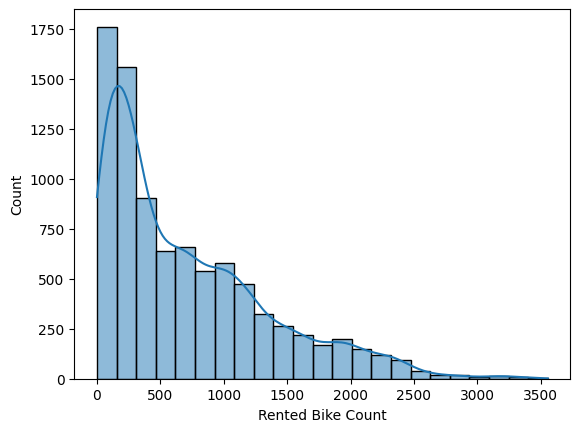

In [ ]:
import seaborn as sns
sns.histplot(data=df, x="Rented Bike Count", kde=True, bins=23);

In [ ]:
df['Rented Bike Count'].skew()

1.1534281773679014

In [ ]:
df['Rented Bike Count'].kurtosis()

0.8533869902003848

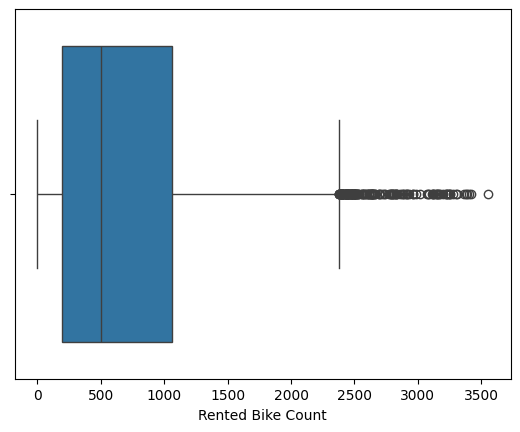

In [ ]:
sns.boxplot(x = 'Rented Bike Count', data = df);

In [ ]:
df['Rented Bike Count'].median()

504.5

In [ ]:
# 아래 코딩을 실시하면 경고문(warning)이 나타나는데 책의 흐름상 무시해도 무방

df.loc[df['Rented Bike Count'] >= 504.5, "Rented Bike B"] = 1  # Rented Bike Count가 120,000 이상이면 타겟변수 Rented Bike B 값은 1.
df.loc[df['Rented Bike Count'] <  504.5, "Rented Bike B"] = 0  # Rented Bike Count가 120,000 미만이면 타겟변수 Rented Bike B 값은 0.
df['Rented Bike B'].value_counts(dropna=False)        # Rented Bike B 값의 개수 분포 구하기.

Rented Bike B
0.0    4380
1.0    4380
Name: count, dtype: int64

In [ ]:
# 참조 코딩
df['Rented Bike B'].value_counts(dropna=False, normalize=True) # VALP_B 값의 비율 분포 구하기.

Rented Bike B
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [ ]:
# 참조 코딩
df.shape

(8760, 15)

# 기타 변수 데이터 처리 1

In [ ]:
# 참조 코딩
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Rented Bike B']

# 기타 변수 데이터 처리 2

In [ ]:
          # comb50.csv파일을 불러와서 데이터프레임(df)에 저장.
df.shape

(8760, 15)

In [ ]:
cols = [
 'Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 'Rainfall',
 'Snowfall'] # 구간 변수를 cols에 저장
df[cols].dtypes



Rented Bike Count          int64
Temperature              float64
Humidity                 float64
Wind speed               float64
Visibility                 int64
Dew point temperature    float64
Solar Radiation          float64
Rainfall                 float64
Snowfall                 float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8755 non-null   float64
 5   Wind speed             8756 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8757 non-null   object 
 13  Functioning Day        8760 non-null   object 
 14  Rented Bike B          8760 non-null   float64
dtypes: f

In [ ]:
#참조 코딩

df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기.

Humidity      True
Wind speed    True
Holiday       True
dtype: bool

In [ ]:
# 데이터프레임 df에 있는 모든 컬럼(변수)의 결측값 보유 비율을 확인

df.isnull().mean().sort_values(ascending=False) # 결측값 비율을 내림차순으로 보여주기

Humidity                 0.000571
Wind speed               0.000457
Holiday                  0.000342
Date                     0.000000
Rented Bike Count        0.000000
Hour                     0.000000
Temperature              0.000000
Visibility               0.000000
Dew point temperature    0.000000
Solar Radiation          0.000000
Rainfall                 0.000000
Snowfall                 0.000000
Seasons                  0.000000
Functioning Day          0.000000
Rented Bike B            0.000000
dtype: float64

In [ ]:
# 참고 코딩

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8755 non-null   float64
 5   Wind speed             8756 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8757 non-null   object 
 13  Functioning Day        8760 non-null   object 
 14  Rented Bike B          8760 non-null   float64
dtypes: f

In [ ]:
df[cols].describe()   # 구간(interval) 변수의 요약통계 구하기

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8755.000000,8756.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.224215,1.724874,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362398,1.036407,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()                              # 구간(interval) 변수의 요약통계 구하기

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.00,8760.00,8755.00,8756.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,12.88,58.22,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


In [ ]:
cols1 = ['Date','Hour', 'Seasons', 'Holiday', 'Functioning Day']

In [ ]:
df[cols1].dtypes

Date               object
Hour                int64
Seasons            object
Holiday            object
Functioning Day    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8755 non-null   float64
 5   Wind speed             8756 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8757 non-null   object 
 13  Functioning Day        8760 non-null   object 
 14  Rented Bike B          8760 non-null   float64
dtypes: f

# 5.1.8 결측값 50% 초과 변수 제거

In [ ]:
# 추가 코딩
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Humidity      True
Wind speed    True
Holiday       True
dtype: bool

In [ ]:
print(df['Humidity'].isnull().mean())
print(df['Wind speed'].isnull().mean())
print(df['Holiday'].isnull().mean())

0.0005707762557077625
0.00045662100456621003
0.00034246575342465754


# 5.1.9 요약통계 및 도수분포표 점검

In [ ]:

df[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.00,8760.00,8755.00,8756.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,12.88,58.22,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


In [ ]:
df[cols].skew()

Rented Bike Count        1.15
Temperature             -0.20
Humidity                 0.06
Wind speed               0.89
Visibility              -0.70
Dew point temperature   -0.37
Solar Radiation          1.50
Rainfall                14.53
Snowfall                 8.44
dtype: float64

In [ ]:
df[cols].kurtosis()

Rented Bike Count         0.85
Temperature              -0.84
Humidity                 -0.80
Wind speed                0.73
Visibility               -0.96
Dew point temperature    -0.76
Solar Radiation           1.13
Rainfall                284.99
Snowfall                 93.80
dtype: float64

In [ ]:

pd.options.display.float_format = '{:.3f}'.format
df['Rainfall'].value_counts(normalize=True)


Rainfall
0.000    0.940
0.500    0.013
1.000    0.008
1.500    0.006
0.100    0.005
2.000    0.004
2.500    0.003
0.200    0.002
3.500    0.002
0.400    0.002
4.000    0.002
3.000    0.002
0.300    0.001
5.500    0.001
4.500    0.001
6.000    0.001
9.500    0.001
6.500    0.001
5.000    0.001
9.000    0.000
1.600    0.000
7.000    0.000
0.900    0.000
0.800    0.000
8.000    0.000
18.000   0.000
13.000   0.000
6.400    0.000
1.100    0.000
18.500   0.000
8.500    0.000
13.500   0.000
7.500    0.000
1.300    0.000
24.000   0.000
7.300    0.000
3.700    0.000
15.500   0.000
29.500   0.000
21.000   0.000
21.500   0.000
1.200    0.000
9.100    0.000
12.000   0.000
10.500   0.000
4.900    0.000
14.500   0.000
16.000   0.000
0.700    0.000
5.400    0.000
11.500   0.000
12.500   0.000
10.000   0.000
19.000   0.000
35.000   0.000
2.400    0.000
1.900    0.000
3.300    0.000
17.000   0.000
1.400    0.000
1.800    0.000
Name: proportion, dtype: float64

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
df['Snowfall'].value_counts(normalize=True)

Snowfall
0.000   0.949
0.300   0.005
1.000   0.004
0.900   0.004
0.500   0.004
0.700   0.004
0.800   0.003
2.000   0.003
0.400   0.002
1.600   0.002
2.200   0.002
0.200   0.002
0.600   0.002
3.500   0.002
2.600   0.001
2.500   0.001
1.200   0.001
2.700   0.001
1.800   0.001
3.000   0.001
4.000   0.000
4.100   0.000
3.200   0.000
1.300   0.000
3.700   0.000
3.300   0.000
1.100   0.000
3.800   0.000
2.300   0.000
2.100   0.000
1.900   0.000
1.700   0.000
2.400   0.000
3.400   0.000
8.800   0.000
2.800   0.000
2.900   0.000
0.100   0.000
5.000   0.000
4.800   0.000
1.400   0.000
3.900   0.000
4.300   0.000
5.100   0.000
1.500   0.000
3.100   0.000
7.100   0.000
7.000   0.000
6.000   0.000
3.600   0.000
4.200   0.000
Name: proportion, dtype: float64

In [ ]:
df.drop(['Rainfall', 'Snowfall'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8755 non-null   float64
 5   Wind speed             8756 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Seasons                8760 non-null   object 
 10  Holiday                8757 non-null   object 
 11  Functioning Day        8760 non-null   object 
 12  Rented Bike B          8760 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 889.8+ KB


# 5.1.10 이상값 제거

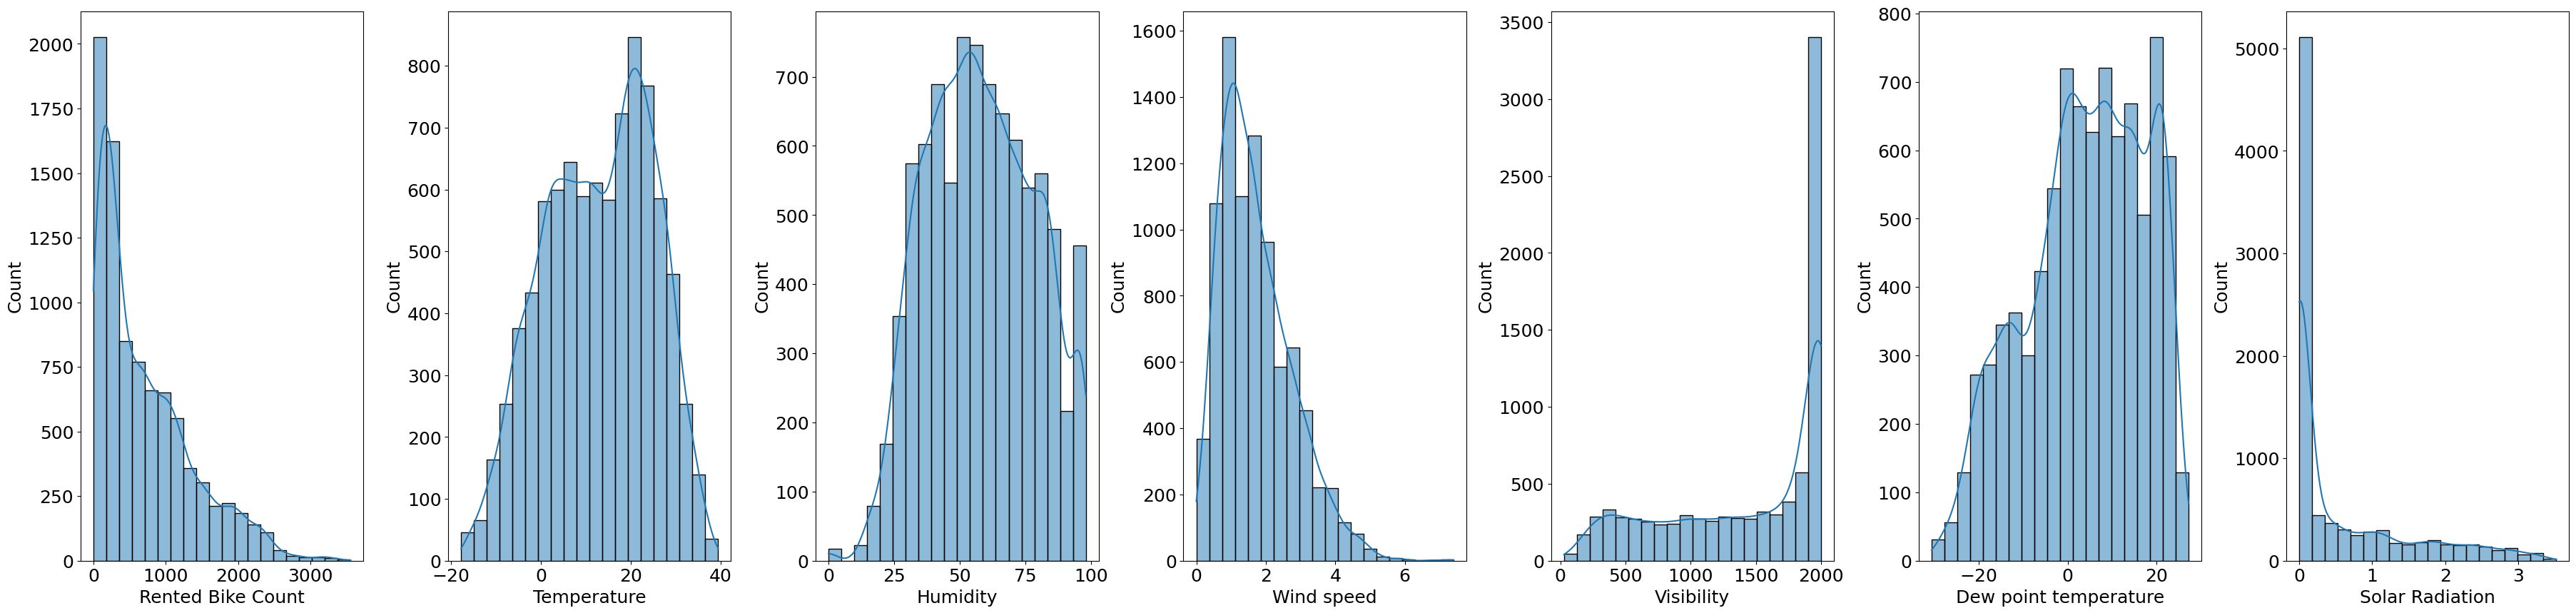

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(1, 7, figsize=(45, 10))

sns.histplot(ax=axes[0], data=df, x="Rented Bike Count", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="Temperature", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="Humidity", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df, x="Wind speed", kde=True, bins=20);
sns.histplot(ax=axes[4], data=df, x="Visibility", kde=True, bins=20);
sns.histplot(ax=axes[5], data=df, x="Dew point temperature", kde=True, bins=20)
sns.histplot(ax=axes[6], data=df, x="Solar Radiation", kde=True, bins=20);
plt.subplots_adjust(wspace=0.3)
plt.show();

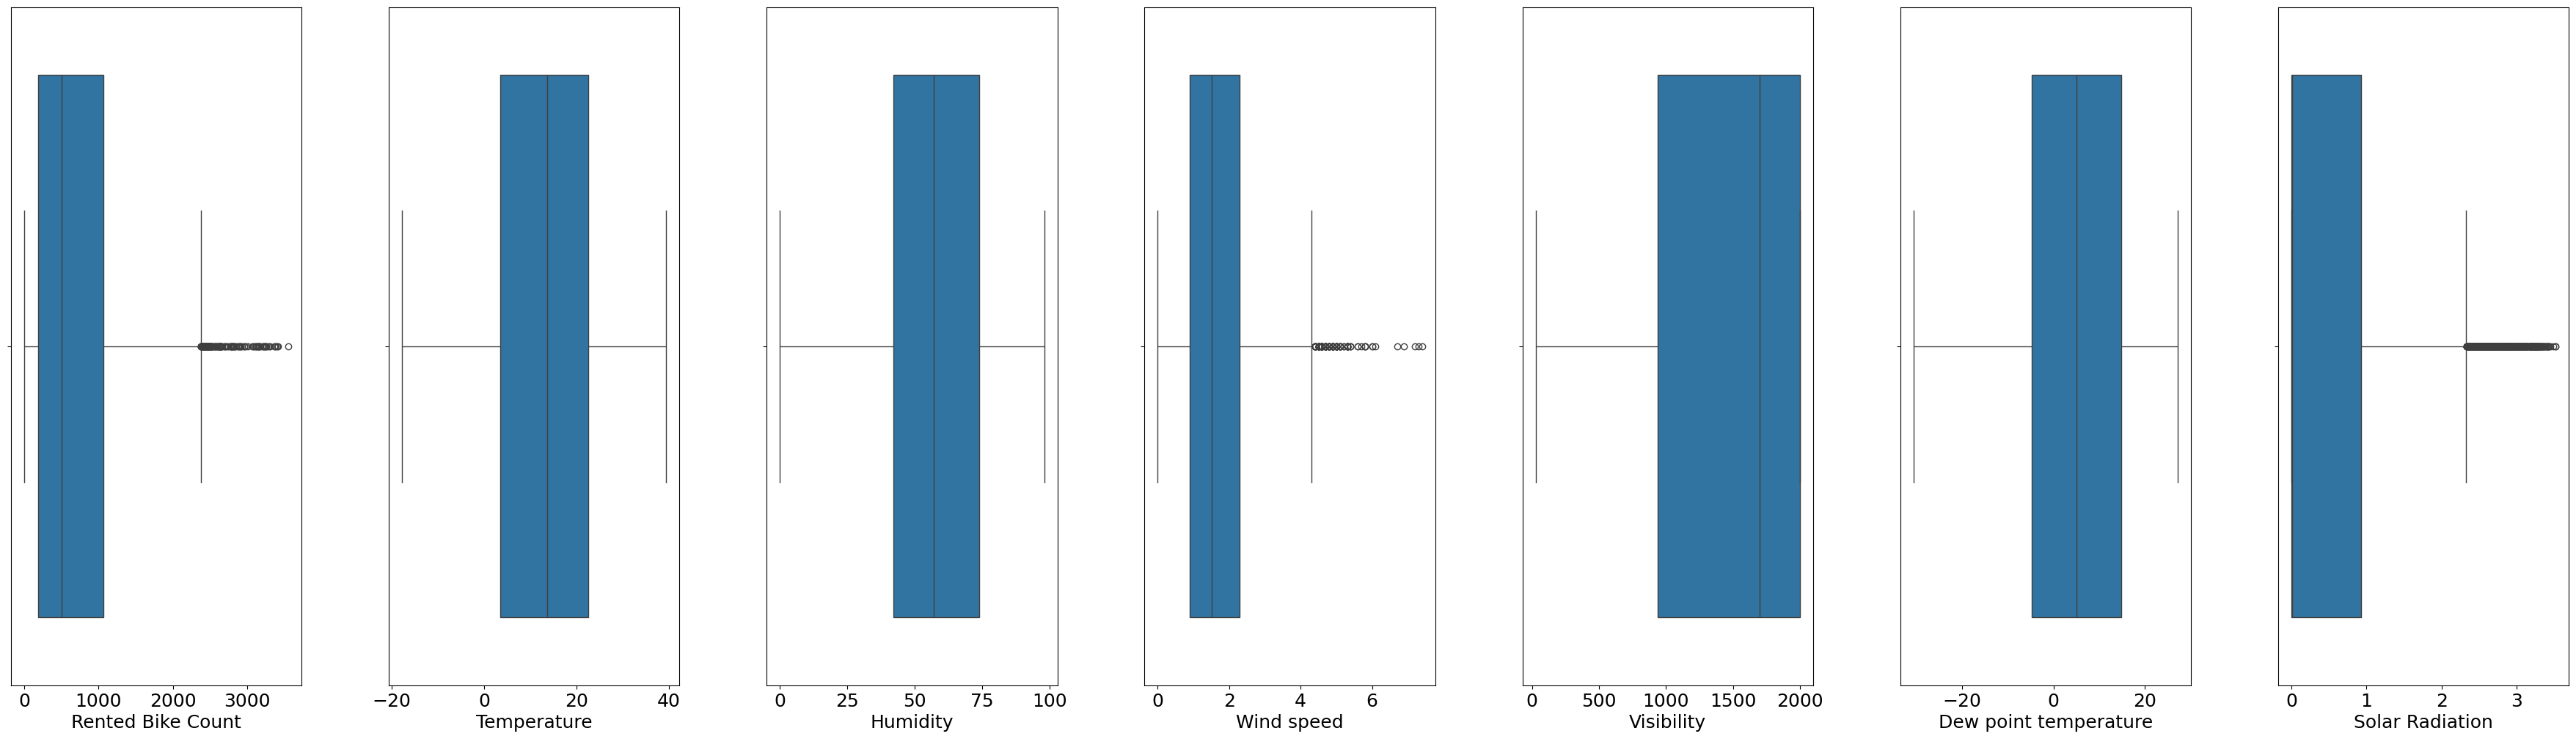

In [ ]:


#sns.boxplot(ax=axes[0], x = '전용면적', data = df)

fig, axes = plt.subplots(1, 7, figsize=(45, 12))

sns.boxplot(ax=axes[0], data=df, x='Rented Bike Count');
sns.boxplot(ax=axes[1], data=df, x='Temperature' );
sns.boxplot(ax=axes[2], data=df, x='Humidity');
sns.boxplot(ax=axes[3], data=df, x='Wind speed');
sns.boxplot(ax=axes[4], data=df, x='Visibility');
sns.boxplot(ax=axes[5], data=df, x='Dew point temperature');
sns.boxplot(ax=axes[6], data=df, x='Solar Radiation');
plt.subplots_adjust(wspace=0.3)
plt.show();

In [ ]:
Q1 = df[[ 'Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 ]].quantile(0.25)
Q3 = df[[ 'Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation'
 ]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count        874.250
Temperature               19.000
Humidity                  32.000
Wind speed                 1.400
Visibility              1060.000
Dew point temperature     19.500
Solar Radiation            0.930
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

Rented Bike Count       -2431.750
Temperature               -53.500
Humidity                  -54.000
Wind speed                 -3.300
Visibility              -2240.000
Dew point temperature     -63.200
Solar Radiation            -2.790
dtype: float64


In [ ]:
print(Upper)

Rented Bike Count       3688.000
Temperature               79.500
Humidity                 170.000
Wind speed                 6.500
Visibility              5180.000
Dew point temperature     73.300
Solar Radiation            3.720
dtype: float64


In [ ]:
c1 = df['Rented Bike Count'] <= 3688
c2 = df['Wind speed'] <= 6.5
c3 = df['Solar Radiation'] <= 3.72
df2 = df[c1&c2&c3]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8751 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8751 non-null   object 
 1   Rented Bike Count      8751 non-null   int64  
 2   Hour                   8751 non-null   int64  
 3   Temperature            8751 non-null   float64
 4   Humidity               8746 non-null   float64
 5   Wind speed             8751 non-null   float64
 6   Visibility             8751 non-null   int64  
 7   Dew point temperature  8751 non-null   float64
 8   Solar Radiation        8751 non-null   float64
 9   Seasons                8751 non-null   object 
 10  Holiday                8748 non-null   object 
 11  Functioning Day        8751 non-null   object 
 12  Rented Bike B          8751 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 957.1+ KB


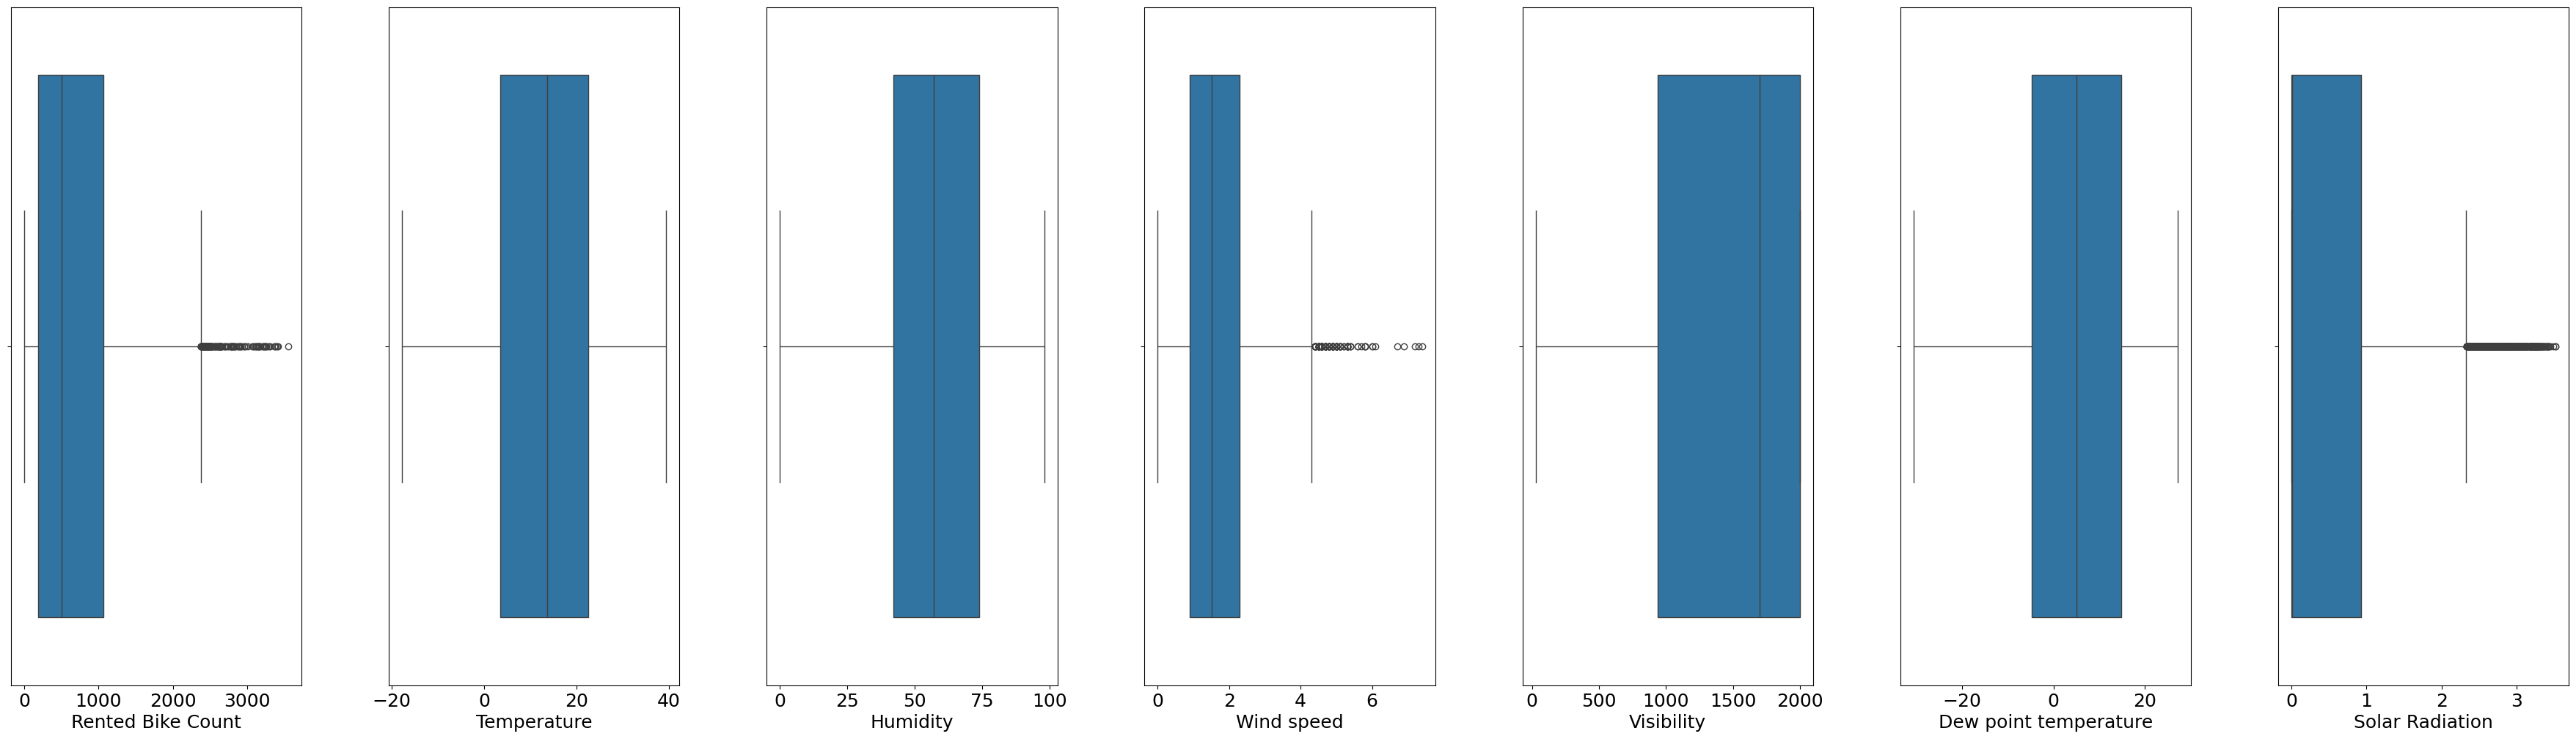

In [ ]:
# 추가 코딩
fig, axes = plt.subplots(1, 7, figsize=(45, 12))

sns.boxplot(ax=axes[0], data=df, x='Rented Bike Count');
sns.boxplot(ax=axes[1], data=df, x='Temperature' );
sns.boxplot(ax=axes[2], data=df, x='Humidity');
sns.boxplot(ax=axes[3], data=df, x='Wind speed');
sns.boxplot(ax=axes[4], data=df, x='Visibility');
sns.boxplot(ax=axes[5], data=df, x='Dew point temperature');
sns.boxplot(ax=axes[6], data=df, x='Solar Radiation');
plt.subplots_adjust(wspace=0.3)
plt.show();

# 5.1.11 상관관계 검토

In [ ]:

cols = [
 'Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation']

round(df2[cols].corr(), 2)               # 구간 변수간 상관계수 디스플레이

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation
Rented Bike Count,1.000,0.540,-0.200,0.120,0.200,0.380,0.260
Temperature,0.540,1.000,0.160,-0.040,0.040,0.910,0.350
Humidity,-0.200,0.160,1.000,-0.340,-0.540,0.540,-0.460
Wind speed,0.120,-0.040,-0.340,1.000,0.170,-0.180,0.340
Visibility,0.200,0.040,-0.540,0.170,1.000,-0.180,0.150
Dew point temperature,0.380,0.910,0.540,-0.180,-0.180,1.000,0.090
Solar Radiation,0.260,0.350,-0.460,0.340,0.150,0.090,1.000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8751 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8751 non-null   object 
 1   Rented Bike Count      8751 non-null   int64  
 2   Hour                   8751 non-null   int64  
 3   Temperature            8751 non-null   float64
 4   Humidity               8746 non-null   float64
 5   Wind speed             8751 non-null   float64
 6   Visibility             8751 non-null   int64  
 7   Dew point temperature  8751 non-null   float64
 8   Solar Radiation        8751 non-null   float64
 9   Seasons                8751 non-null   object 
 10  Holiday                8748 non-null   object 
 11  Functioning Day        8751 non-null   object 
 12  Rented Bike B          8751 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 957.1+ KB


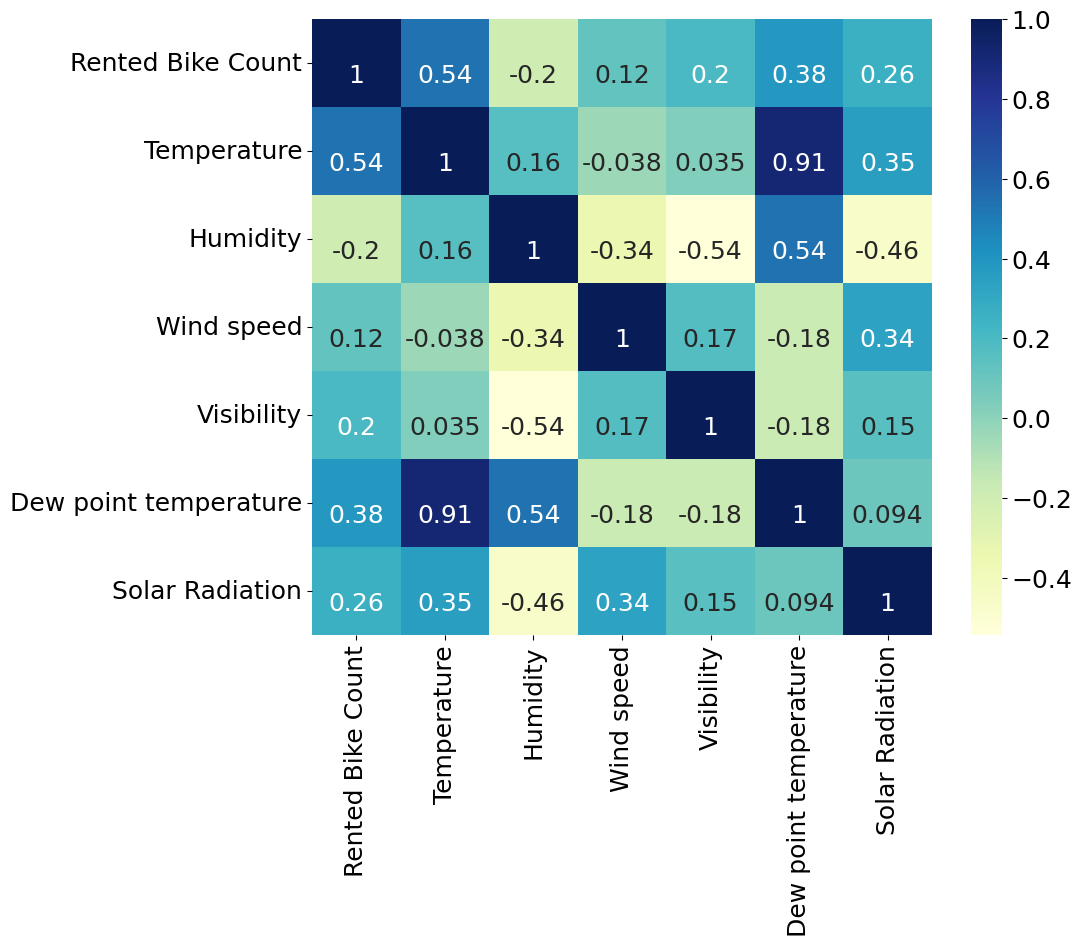

In [ ]:
# 추가 코딩
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 'Dew point temperature'를 삭제한 컬럼 목록


# 상관행렬 계산
corr = df2[cols].corr()

# 전체 그림 크기 설정
plt.figure(figsize=(10, 8))  # 여기에서 (width, height)를 조정하여 크기를 변경

# 히트맵 생성
annot_kws = {"ha": 'center', "va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu")

# 그림 표시
plt.show()


In [ ]:
df2.drop(['Dew point temperature'], axis=1, inplace=True)

<ipython-input-53-2c48ba4ebe76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Dew point temperature'], axis=1, inplace=True)


In [ ]:
df2.to_csv('/content/drive/MyDrive/기말고사 과제/House Data Cleaning 1.csv', index=False)

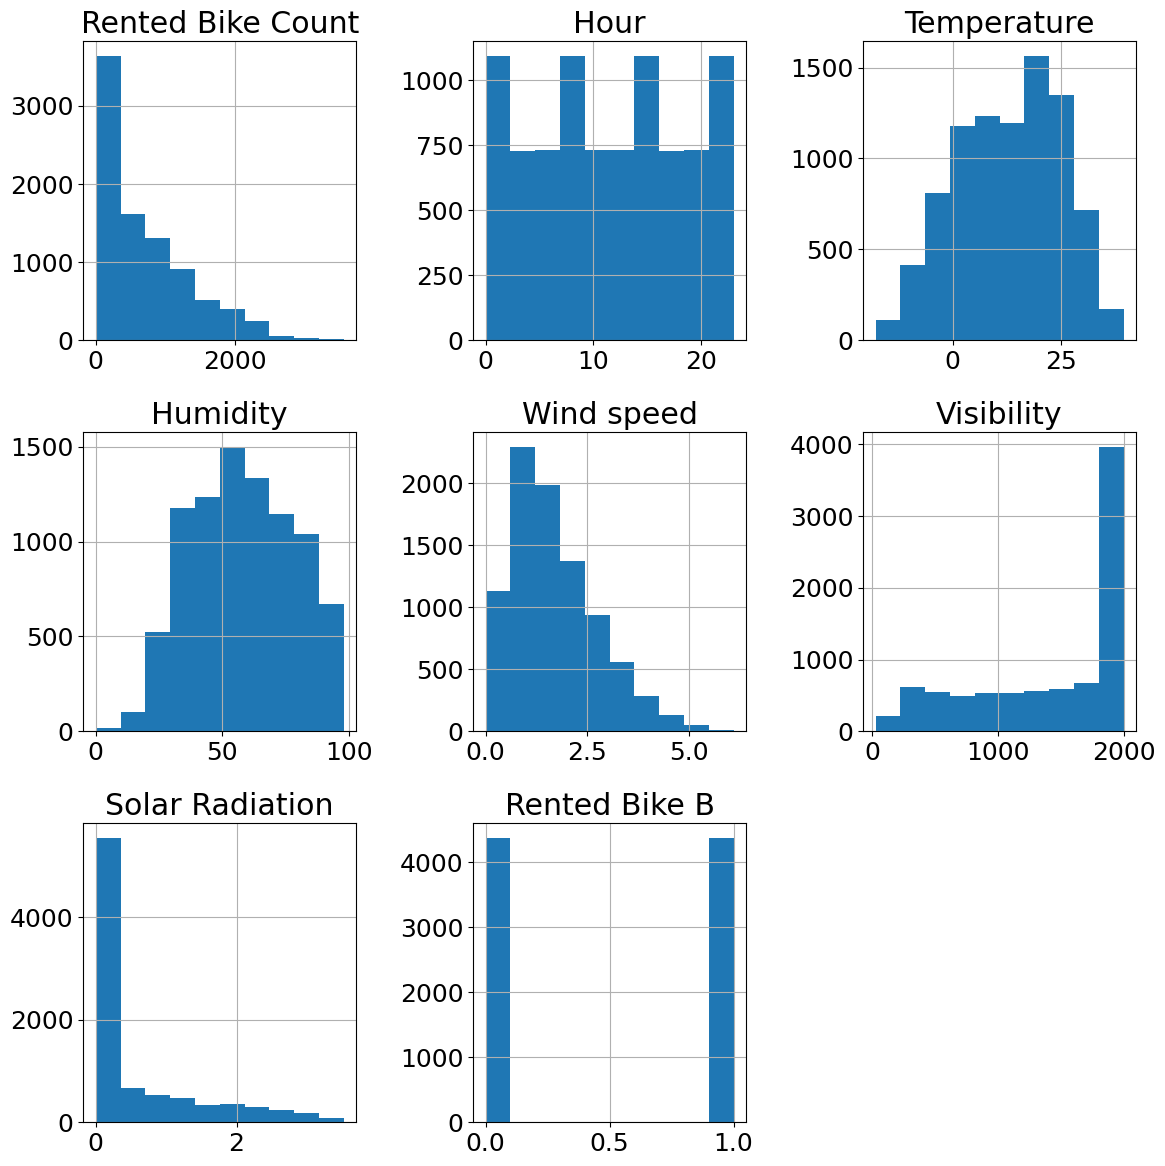

<class 'pandas.core.frame.DataFrame'>
Index: 8751 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8751 non-null   object 
 1   Rented Bike Count  8751 non-null   int64  
 2   Hour               8751 non-null   int64  
 3   Temperature        8751 non-null   float64
 4   Humidity           8746 non-null   float64
 5   Wind speed         8751 non-null   float64
 6   Visibility         8751 non-null   int64  
 7   Solar Radiation    8751 non-null   float64
 8   Seasons            8751 non-null   object 
 9   Holiday            8748 non-null   object 
 10  Functioning Day    8751 non-null   object 
 11  Rented Bike B      8751 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 888.8+ KB


In [ ]:



df2.hist(figsize=(10, 10))  # figsize는 그림 크기 설정
plt.tight_layout()  # 레이아웃 조정
plt.show()
df2.info()

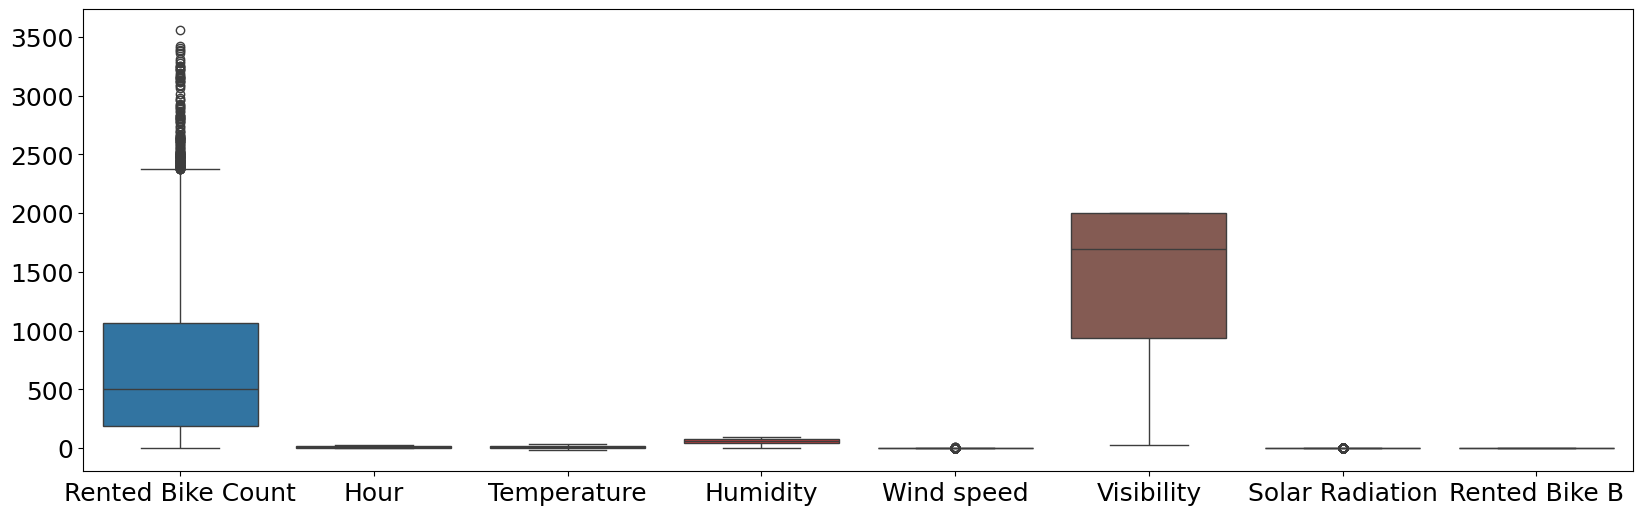

In [ ]:
plt.figure(figsize=(20, 6))  # 그림 크기 설정
sns.boxplot(data=df2)
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8751 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8751 non-null   object 
 1   Rented Bike Count  8751 non-null   int64  
 2   Hour               8751 non-null   int64  
 3   Temperature        8751 non-null   float64
 4   Humidity           8746 non-null   float64
 5   Wind speed         8751 non-null   float64
 6   Visibility         8751 non-null   int64  
 7   Solar Radiation    8751 non-null   float64
 8   Seasons            8751 non-null   object 
 9   Holiday            8748 non-null   object 
 10  Functioning Day    8751 non-null   object 
 11  Rented Bike B      8751 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 888.8+ KB


# 5.1.13 t-검정

In [ ]:
from scipy import stats

data_1 = df2[df2['Rented Bike B'] == 1]['Temperature']
data_0 = df2[df2['Rented Bike B'] == 0]['Temperature']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

TtestResult(statistic=64.51521486646551, pvalue=0.0, df=8749.0)

In [ ]:
df2['Humidity'].fillna(df['Humidity'].mean(), inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8751 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8751 non-null   object 
 1   Rented Bike Count  8751 non-null   int64  
 2   Hour               8751 non-null   int64  
 3   Temperature        8751 non-null   float64
 4   Humidity           8751 non-null   float64
 5   Wind speed         8751 non-null   float64
 6   Visibility         8751 non-null   int64  
 7   Solar Radiation    8751 non-null   float64
 8   Seasons            8751 non-null   object 
 9   Holiday            8748 non-null   object 
 10  Functioning Day    8751 non-null   object 
 11  Rented Bike B      8751 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 888.8+ KB


<ipython-input-147-9010b6de5f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Humidity'].fillna(df['Humidity'].mean(), inplace=True)


In [ ]:
# 추가 코딩
from scipy import stats

data_1 = df2[df2['Rented Bike B'] == 1]['Humidity']
data_0 = df2[df2['Rented Bike B'] == 0]['Humidity']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

TtestResult(statistic=-17.15601632220937, pvalue=6.487308180792802e-65, df=8749.0)

In [ ]:
from scipy import stats

data_1 = df2[df2['Rented Bike B'] == 1]['Wind speed']
data_0 = df2[df2['Rented Bike B'] == 0]['Wind speed']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

TtestResult(statistic=8.503484877615856, pvalue=2.1433039984344675e-17, df=8749.0)

In [ ]:
from scipy import stats

data_1 = df2[df2['Rented Bike B'] == 1]['Visibility']
data_0 = df2[df2['Rented Bike B'] == 0]['Visibility']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

TtestResult(statistic=15.861804229325129, pvalue=6.97069383629778e-56, df=8749.0)

In [ ]:
from scipy import stats

data_1 = df2[df2['Rented Bike B'] == 1]['Solar Radiation']
data_0 = df2[df2['Rented Bike B'] == 0]['Solar Radiation']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

TtestResult(statistic=38.609114238936044, pvalue=2.827727742069316e-301, df=8749.0)